# Beer reviews data Analysis

Data Source: https://drive.google.com/open?id=1e-kyoB97a5tnE7X4T4Es4FHi4g6Trefq <br>
										

## Features

This is where you'll get different information about each of the features in your data.

Attribute Information:

1. beer_ABV - alcohol by volume(ABV) to assess the strength of a particular beer
2. beer_beerId - unique identifier for the beer
3. beer_brewerId - unqiue identifier for the brewer
4. beer_name - name of the beer
5. beer_style - categories of beers
6. review_appearance - appereance of the review rating between 1 to 5
7. review_palette - palette of the review rating rating between 1 and 5
8. review_overall - overall review rating between 1 to 5
9. review_taste - taste of the review rating between 1 to 5
10. review_profileName - profile name for the review rating between 1 to 5
11. review_aroma - scent of beer for the review rating between 1 to 5
8. review_time - timestamp for the review
10. review_text - text of the review

## Objective

In a statement,
> To Explore the dataset of beer reviews and look for hidden answer from the data and analyze trend/pattern in data and find the solution of given problem.

### Questions
    
1.	Rank top 3 Breweries which produce the strongest beers?
2.	Which year did beers enjoy the highest ratings? 
3.	 Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5.	Which Beer style seems to be the favorite based on reviews written by users? 
6.	How does written review compare to overall review score for the beer styles?


In [4]:
# Regular EDA (exploratory data analysis) and plotting libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re
import time
import nltk
#for plotting
import seaborn as sns
import matplotlib.pyplot as plt
# we want our plots to appear inside the notebook
%matplotlib inline

## Load Data

In [7]:
start_time = time.clock()
read_data = 'BeerDataScienceProject\BeerDataScienceProject.csv'
df_beer = pd.read_csv(read_data,encoding='ISO-8859-1')
print('Time took to load the data :',time.clock() - start_time, "seconds")

Time took to load the data : 10.208115000000006 seconds


In [8]:
print(df_beer.shape) #row,column
print("Number of reviews: ", df_beer.shape[0])
print("Number of features: ", df_beer.shape[1])

(528870, 13)
Number of reviews:  528870
Number of features:  13


## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df_beer.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [4]:
#checking the info of the dataframe shows us the data type to check which columns are int,float,object
df_beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


* The beer dataset contains 528870 rows, and 13 columns 
* Contain some missing values such as beer_ABV
* As in review_time column which showing integer datatype of time which is called *epoch time* the time in seconds since Jan 1st 1970 so we have to convert in datetime datatype

In [5]:
df_beer.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [6]:
# Count the datatype 
dtype_df = df_beer.dtypes.reset_index()
dtype_df.columns = ['Count','Column Type']
dtype_df.groupby('Column Type').aggregate('count')

,Count
Column Type,
int64,3
float64,6
object,4


### Missing values

Let's go ahead and find out which variables of the dataset contain missing values

In [7]:
total = df_beer.isnull().sum().sort_values(ascending=False)
percent = (df_beer.isnull().sum()/df_beer.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent %'])
missing_data

,Total,Percent %
beer_ABV,20280,3.834591
review_text,119,0.022501
review_profileName,115,0.021744
review_time,0,0.000000
review_aroma,0,0.000000
review_taste,0,0.000000
review_overall,0,0.000000
review_palette,0,0.000000
review_appearance,0,0.000000
beer_style,0,0.000000


In [8]:
df_beer['review_overall'].value_counts()

4.0    196544
4.5    110928
3.5     98901
3.0     53707
5.0     31028
2.5     18539
2.0     11931
1.5      3996
1.0      3293
0.0         3
Name: review_overall, dtype: int64

**As we can see there are three features which have missing values where beer_ABV contains 3.8 percent of data missing and rest two feature have very low missing percentage so we can drop null values as it won't impact to the dataset so much**

In [9]:
#Copy the dataframe
new_beer_data = df_beer.copy()

In [10]:
new_beer_data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [11]:
#removing null values
new_beer_data = new_beer_data.dropna()

In [12]:
#Checking is there any null in our dataset
total = new_beer_data.isnull().sum().sort_values(ascending=False)
percent = (new_beer_data.isnull().sum()/new_beer_data.isnull().count()).sort_values(ascending=False)*100
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent %'])
missing_data

,Total,Percent %
review_time,0,0.0
review_text,0,0.0
review_aroma,0,0.0
review_profileName,0,0.0
review_taste,0,0.0
review_overall,0,0.0
review_palette,0,0.0
review_appearance,0,0.0
beer_style,0,0.0
beer_name,0,0.0


As we can see there is no null values in dataframe now we can move forward in analysis

In [13]:
#Now we will change the datatype of review_time column with datetime datatype
new_beer_data['review_time'] = pd.to_datetime(new_beer_data['review_time'],unit='s')
new_beer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508358 entries, 0 to 528796
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            508358 non-null  float64       
 1   beer_beerId         508358 non-null  int64         
 2   beer_brewerId       508358 non-null  int64         
 3   beer_name           508358 non-null  object        
 4   beer_style          508358 non-null  object        
 5   review_appearance   508358 non-null  float64       
 6   review_palette      508358 non-null  float64       
 7   review_overall      508358 non-null  float64       
 8   review_taste        508358 non-null  float64       
 9   review_profileName  508358 non-null  object        
 10  review_aroma        508358 non-null  float64       
 11  review_text         508358 non-null  object        
 12  review_time         508358 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64

As we can see we have convert the integer datatype into datetime datatype

In [14]:
new_beer_data['review_time'].head()

0   2009-02-16 20:57:03
1   2009-03-01 13:44:57
2   2009-03-01 14:10:04
3   2009-02-15 19:12:25
4   2010-12-30 18:53:26
Name: review_time, dtype: datetime64[ns]

Now review_time column can be easily read as convert the datatype into datetime

## Text Preprocessing.
our data requires some preprocessing before we go on further with analysis:-

1. Remove any punctuations or limited set of special characters like , or . or # etc.
2. Check if the word is made up of english letters and is not alpha-numeric
3. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters)
4. Convert the word to lowercase<br>

After which we collect the words used to describe positive and negative reviews

In [15]:
#printing some random reviews for checking punctuation or alpha-numeric
print(new_beer_data['review_text'].values[100])
print('='*50)
print(new_beer_data['review_text'].values[420])
print('='*50)

The Caldera Pale Ale poured an clear orange hue with a finger foam head. It had some tight bubble lacing patterns. The aroma was semi sweet malty smell with some pine hopiness jumping into the nose. It had a powerful aroma for a pale ale. Taste was good. It has a bread malt up front with a moderate hop feel on the back end. In the mouth it had a good sharp bite on the finish. Overall a good solid local pale ale.
Pours a brilliant, shimmering honey color. Very generous off white head, sticks around with good lacing. Smells like im sticking my head in a barrel of fresh hops. very floral and earthy, some citrus. the hop presence in the smell of this beer is assertive and strong. Taste gives way to fresh, juicy grapefruit and resinous pine. Extremely vibrant. Definitely hop forward, not a lot of malt to explore in this one. Mouthfeel is medium bodied, carbonation is nice and moderate. Has a nice flowing, juicy feel to it in the mouth, I can tell this beer is very fresh. Highly drinkable, I

In [16]:
def decontracted(phrase):
    '''
    Expanding english language i.e: i'll -> i will
    
    '''
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
def preprocess(x):
    x = str(x).lower()
    #remove words with numbers python                       
    x = re.sub("\S*\d\S*", "", x).strip()
    #remove urls from text python
    x = re.sub(r"http\S+", "", x)
    #remove spacial character
    x = re.sub('[^A-Za-z0-9]+', ' ', x)
    #expand english words
    x = decontracted(x)
    return x
    

### Cleaning the review text column

In [18]:
start_time = time.clock()
new_beer_data['review_text'] = new_beer_data['review_text'].apply(preprocess)
print('Total time taken to clean text :',time.clock() - start_time, "seconds")

Total time taken to clean text : 66.9760474 seconds


In [19]:
new_beer_data['review_text'].values[0]

'a lot of foam but a lot in the smell some banana and then lactic and tart not a good start quite dark orange in color with a lively carbonation now visible under the foam again tending to lactic sourness same for the taste with some yeast and banana '

`As we can see we removed unwanted words and special characters and make every word lower`

### Checking for duplicate data

In [20]:
#creating a copy of dataframe
unique_beer_data = new_beer_data.copy()

In [21]:
dup_bool = unique_beer_data.duplicated(['beer_name', 'beer_style','review_profileName' ])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 5295 duplicate rating entries in the data..


In [22]:
#Drop duplicates
unique_beer_data = unique_beer_data.drop_duplicates(subset=['beer_name', 'beer_style','review_profileName'],keep='first')

In [23]:
#Check whether there is duplication or not

In [24]:
dup_bool = unique_beer_data.duplicated(['beer_name', 'beer_style','review_profileName' ])
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


### Analyse Ratings

In [25]:
#Check if there is any unwanted rating i.e out of rating range as rating range is 1 to 5 
#lets see if there is any rating that is out of rating range

#Lets remove ratings which are not in range as we analyse only two features are contains 0 rating which are review_appearance and review_overall
unique_beer_data = unique_beer_data[(unique_beer_data['review_appearance'] >=1) & unique_beer_data['review_overall'] >=1]

In [26]:
unique_beer_data['review_overall'].max()

5.0

In [27]:
#Check how many are discrete variable in dataset
discrete_vars = [var for var in unique_beer_data.columns if unique_beer_data[var].dtypes!='O'and  unique_beer_data[var].dtypes!='datetime64[ns]']
print('numerical variables: ',discrete_vars)
print('Total number of numerical variable:',len(discrete_vars))

numerical variables:  ['beer_ABV', 'beer_beerId', 'beer_brewerId', 'review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma']
Total number of numerical variable: 8


In [28]:
#Check how many are categorical variable in dataset
cat_vars = [var for var in unique_beer_data.columns if unique_beer_data[var].dtypes =='O'and unique_beer_data[var].dtypes!='datetime64[ns]']
print('numerical variables: ',cat_vars)
print('Total number of categorical variable:',len(cat_vars))

numerical variables:  ['beer_name', 'beer_style', 'review_profileName', 'review_text']
Total number of categorical variable: 4


In [29]:
unique_beer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503060 entries, 0 to 528796
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            503060 non-null  float64       
 1   beer_beerId         503060 non-null  int64         
 2   beer_brewerId       503060 non-null  int64         
 3   beer_name           503060 non-null  object        
 4   beer_style          503060 non-null  object        
 5   review_appearance   503060 non-null  float64       
 6   review_palette      503060 non-null  float64       
 7   review_overall      503060 non-null  float64       
 8   review_taste        503060 non-null  float64       
 9   review_profileName  503060 non-null  object        
 10  review_aroma        503060 non-null  float64       
 11  review_text         503060 non-null  object        
 12  review_time         503060 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64

### Distribution of ratings
#### Review Overall

In [108]:
#looking the each rating distribution for overall review
unique_beer_data['review_overall'].value_counts()

4.0    187639
4.5    106338
3.5     93675
3.0     50457
5.0     29791
2.5     17299
2.0     11108
1.5      3682
1.0      3071
Name: review_overall, dtype: int64

In [30]:
#Create plot which shows percentage of each distribution

def count_plot(df,feature,title='',size=2):
    '''
    Parameters
    ----------
    df : DataFrame of dataset
    feature : feature of dataframe
    title : description of plot
    size : by default is 2
    '''
    f,ax=plt.subplots(1,1,figsize=(4*size,3*size))
    total = float(len(df))
    sns.countplot(df[feature],order=df[feature].value_counts().index,palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
               height+3,
               '{:1.2f}%'.format(100*height/total),
               ha='center')
    

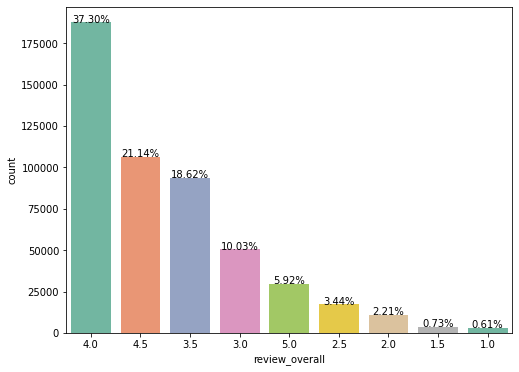

In [31]:
count_plot(df=unique_beer_data,feature='review_overall')

`From the above plot we can see that rating 4.0 contains most percentage value which has 37.30% followed by rating 4.5 which contains the 21.14% in overall review feature`

#### Review appearance

In [32]:
#looking the each rating distribution for review appearence
unique_beer_data['review_appearance'].value_counts()

4.0    215657
3.5     97768
4.5     97107
3.0     49509
5.0     22418
2.5     11373
2.0      6958
1.5      1492
1.0       778
Name: review_appearance, dtype: int64

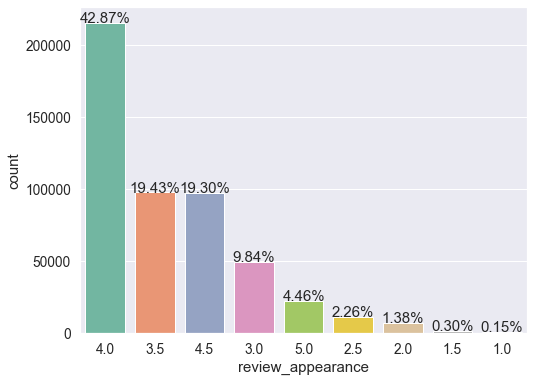

In [114]:
count_plot(df=unique_beer_data,feature='review_appearance')

`From the above plot we can see that rating 4.0 contains most percentage value which has 42.87% followed by rating 3.5 which contains the 19.43% and rating 4.5 which is equalt percentage to 3.5(19.30%) in review appearence feature`

### Review taste

In [34]:
#looking the each rating distribution for review taste
unique_beer_data['review_taste'].value_counts()

4.0    196934
3.5    105088
4.5     83792
3.0     62662
5.0     20952
2.5     18194
2.0     10814
1.5      2925
1.0      1699
Name: review_taste, dtype: int64

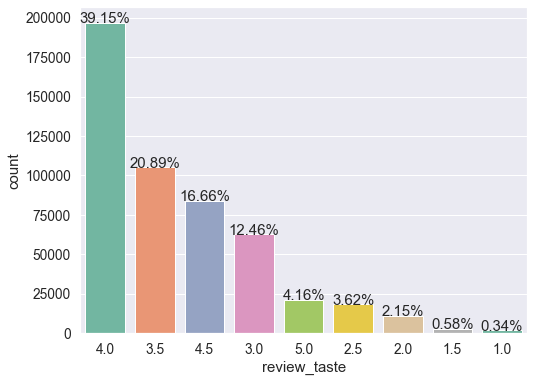

In [113]:
count_plot(df=unique_beer_data,feature='review_taste')

`From the above plot we can see that again rating 4.0 contains most percentage value which has 39.15% followed by rating 3.5 which contains the 20.89% in review appearence taste`

### Review aroma

In [111]:
#looking the each rating distribution for review taste
unique_beer_data['review_aroma'].value_counts()

4.0    174088
4.5    112199
3.5    100314
3.0     49979
5.0     28111
2.5     19593
2.0     12068
1.5      4089
1.0      2619
Name: review_aroma, dtype: int64

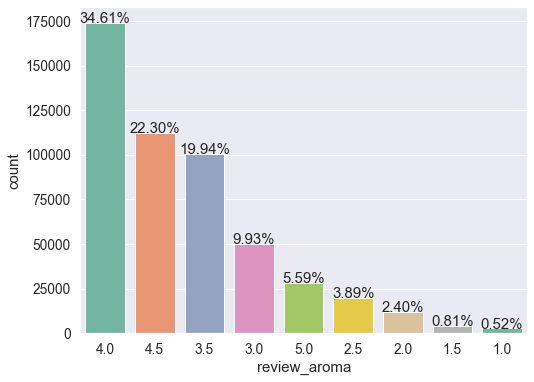

In [112]:
count_plot(df=unique_beer_data,feature='review_aroma')

`From the above plot we can see that again rating 4.0 contains most percentage value which has 34.61% followed by rating 4.5 which contains the 22.30% in review appearence aroma`

`After doing univariate analysing in each feature of reviews we can conclude that most user has given rating 4.0 which is shows that user liked colour,strength,ingredients,taste of beer`

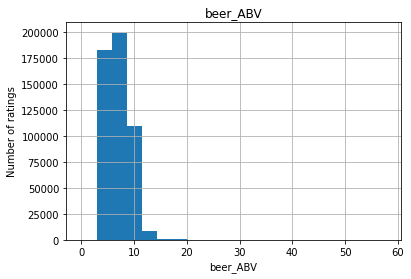

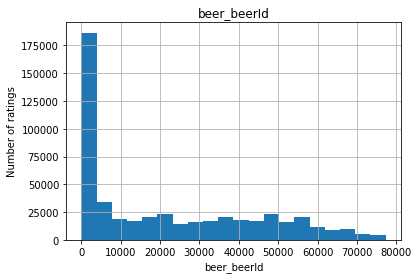

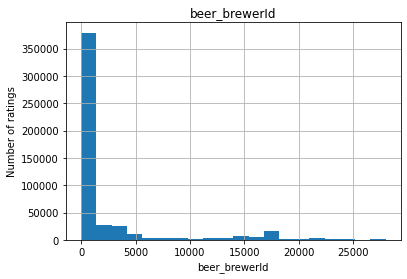

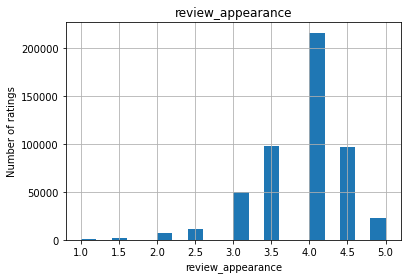

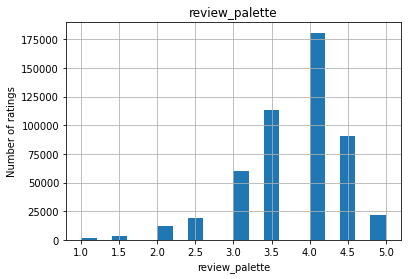

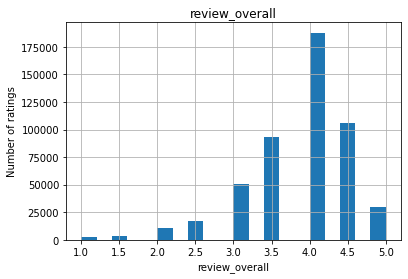

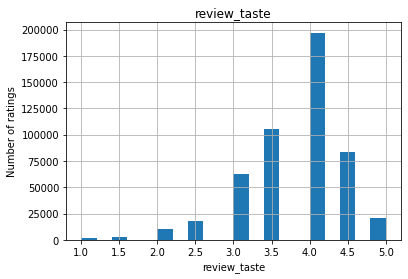

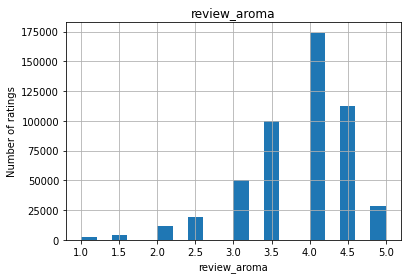

In [36]:
# Let's go ahead and analyse the distributions of these variables
def analyse_discrete(df, var):
    df[var].hist(bins=20)
    plt.ylabel('Number of ratings')
    plt.xlabel(var)
    plt.title(var)
    plt.show()
    
for var in discrete_vars:
    analyse_discrete(unique_beer_data, var)

### We can see from above plots most columns has skewness(ABV,BeerId,brewer)

### We remove ABV value which have negative value

In [ ]:
unique_beer_data = unique_beer_data[unique_beer_data['beer_ABV']>0]

## Questions

### 1. Rank top 3 Breweries which produce the strongest beers?

` So the strongest beer can be measure from how much percent of alcohol it contains so as we know beer ABV shows the level alcohol in beer more the alcohol more stronger the beer is`

In [ ]:
# Extracting specific problem as per the problem statement as beer abv is for alchol value and
# beer name is to know which which beer has high level of alchol then we are sorting in descending to know the high level of alchol
top = unique_beer_data[['beer_ABV','beer_name']]
top_3_beer = top.sort_values(by='beer_ABV',ascending=False).drop_duplicates('beer_name').head(3)
top_3_beer

###  `The top 3 Breweries are :-`
* Schorschbräu Schorschbock 57%
* Schorschbräu Schorschbock 43%	
* Schorschbräu Schorschbock 40%	

In [106]:
def bar_plot(df,x,y,alpha,title='',size=2):
    f,ax=plt.subplots(1,1,figsize=(6*size,5*size))
    total = float(len(df))
    sns.barplot(df[x].value_counts().index,df[y].values,alpha=alpha,palette='Set2')
    plt.title(title)

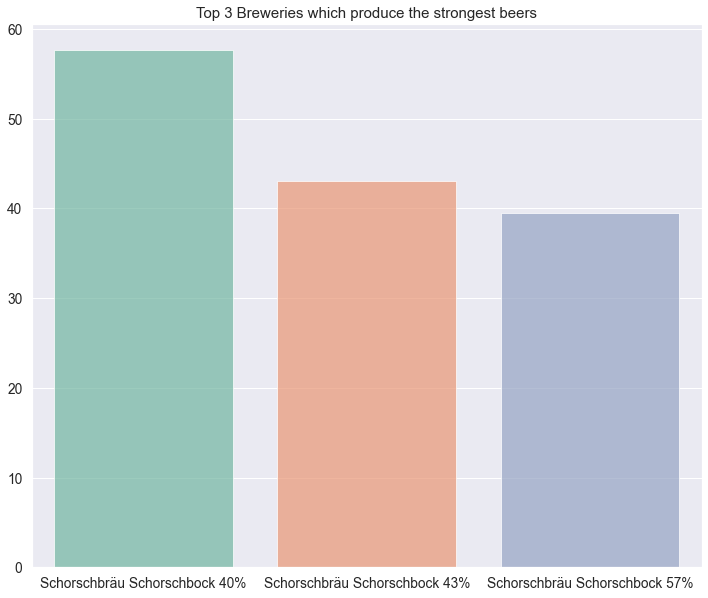

In [107]:
#lets plot Top 3 breweries which produce the strongest beers
bar_plot(df=top_3_beer,x='beer_name',y='beer_ABV',alpha=0.7,title='Top 3 Breweries which produce the strongest beers')

### 2.Which year did beers enjoy the highest ratings? 

In [43]:
#Here we will find highest rating according to year so we will only exctract those columns which are related to our problems
unique_beer_data[['review_overall','review_time']]

,review_overall,review_time
0,1.5,2009-02-16 20:57:03
1,3.0,2009-03-01 13:44:57
2,3.0,2009-03-01 14:10:04
3,3.0,2009-02-15 19:12:25
4,4.0,2010-12-30 18:53:26
...,...,...
528792,4.5,2008-12-04 03:49:29
528793,3.5,2006-04-15 21:06:14
528794,3.0,2008-12-07 09:05:43
528795,3.5,2006-12-22 20:11:57


In [44]:
#So in review_time column we will extract only year values from review_time by using datetime index
unique_beer_data['review_year'] = pd.DatetimeIndex(unique_beer_data['review_time']).year

In [45]:
high_rating_beer = np.round(unique_beer_data[['review_overall','review_year']],1)

In [46]:
#To compare two feature we can use pd.crosstab to find highest rating
pd.crosstab(high_rating_beer['review_overall'],high_rating_beer['review_year'])

review_year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
review_overall,,,,,,,,,,,,,,,
1.0,0,0,0,13,68,114,159,205,311,287,379,482,577,471,5
1.5,0,0,0,0,88,172,205,217,383,351,465,528,619,635,19
2.0,0,0,0,28,211,497,554,663,1084,1016,1491,1615,1805,2091,53
2.5,0,0,0,0,283,777,872,1047,1638,1721,2303,2481,2594,3467,116
3.0,1,0,1,84,702,1914,2327,2834,4433,4860,6798,7621,8459,10164,259
3.5,2,2,1,5,1040,2992,3830,4826,7188,8297,12074,14496,16519,21743,660
4.0,5,6,14,227,2245,5483,7342,9571,14217,15608,24526,30470,34620,42100,1205
4.5,1,2,9,24,1533,3344,4311,6171,8510,9089,13745,17592,19365,22018,624
5.0,2,0,4,147,512,952,1375,1915,2521,2768,4061,5087,5870,4454,123


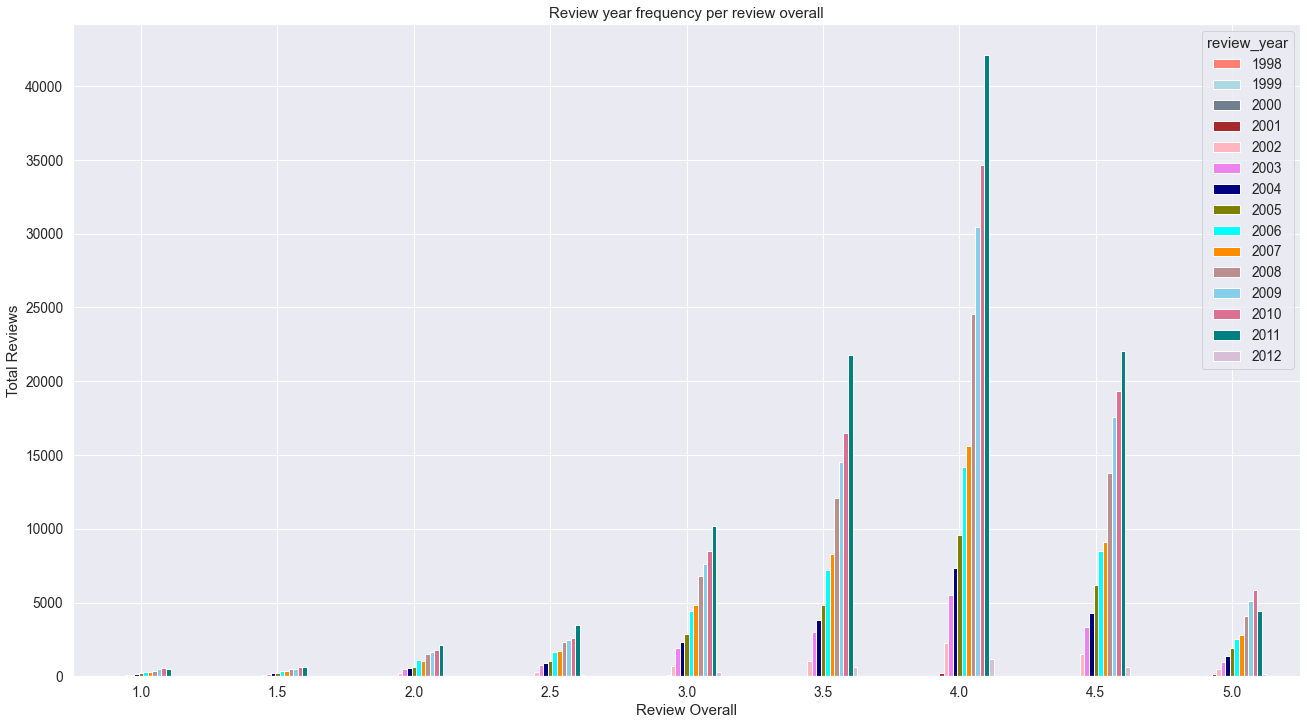

In [87]:
# Make the crosstab more visual
pd.crosstab(high_rating_beer['review_overall'],high_rating_beer['review_year']).plot(kind='bar',
                                                                                    figsize=(22,12),
                                                                                    color=["salmon", "lightblue","slategrey",
                                                                                          "brown","lightpink","violet","navy","olive",
                                                                                          "cyan","darkorange","rosybrown","skyblue","palevioletred",
                                                                                          "teal","thistle"]);
plt.title('Review year frequency per review overall')
plt.xlabel('Review Overall')
plt.ylabel('Total Reviews')
plt.xticks(rotation=0);

`From this plot we are comparing all the years for each rating so we can say that 2011 have the highest rating with 4.0 for beers to enjoy  `

> ### 2011 is the most highest rating year for beers enjoy

### 3.Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
`let's assume the review overall score in data represents the overall quality of beers so now is that which one of these factors(aroma, taste, appearance & palette) is most important in affecting the scoring of the review overall variable`

`we will use correlation matrix to find the most important feature here we are assuming review overall as dependent variable so will correlate with every feature with review overall to find the most important factor based on user's rating`

### Correlation Matrix

In [49]:
#Taking selected columns for important factor as per given in statement
imp_taste = np.round(unique_beer_data[['review_appearance','review_palette','review_taste','review_aroma','review_overall']],1)

In [50]:
# Make a correlation matrix
imp_taste.corr()

,review_appearance,review_palette,review_taste,review_aroma,review_overall
review_appearance,1.000000,0.544192,0.551400,0.530562,0.482746
review_palette,0.544192,1.000000,0.600281,0.703077,0.598110
review_taste,0.551400,0.600281,1.000000,0.722433,0.689205
review_aroma,0.530562,0.703077,0.722433,1.000000,0.780523
review_overall,0.482746,0.598110,0.689205,0.780523,1.000000


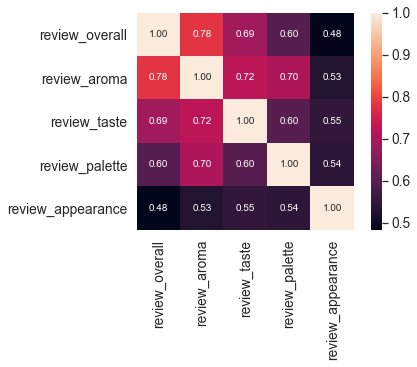

In [83]:
#lets make our correlation matrix a little better
corr_matrix = imp_taste.corr()

#We are find top most corrleated featuew
k = 5
cols = corr_matrix.nlargest(k,'review_overall')['review_overall'].index
cm = np.corrcoef(imp_taste[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,fmt='.2f',
                 annot_kws={'size':10},
                 yticklabels=cols.values,xticklabels=cols.values)

> As per correlation matrix we can conclude that most important factor include **aroma(0.78)->taste(0.69)->palette(0.60)->review appearence(0.48)** -(importance from high to low) 

### 4.If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

`To recommend beer alternatively we can use cosine similarity for better recommendation currently just using simple approach just to keep it simple`\
`We will perform operation based on the beer_name we group the dataset by it, next we calculate mean across the all reviews in dataset and arrange it in descending order to get an ordered format`

In [78]:
#Here we will recommend based on high rating in every review column to recommend top three beer
recomm_beer = unique_beer_data.groupby('beer_name').aggregate({'review_overall':np.mean,'review_appearance':np.mean,'review_taste':np.mean,'review_aroma':np.mean,'review_palette':np.mean,'beer_ABV':np.mean})

recomm_beer_new = pd.DataFrame(recomm_beer.reset_index())

top_recomm = recomm_beer_new.sort_values(['review_overall', 'review_appearance','review_taste','review_aroma','review_palette','beer_ABV'], ascending=[False,False, False, False, False, False])
top_recomm[:3]
                                                                                            

,beer_name,review_overall,review_appearance,review_taste,review_aroma,review_palette,beer_ABV
4036,Edsten Triple-Wit,5.0,5.0,5.0,5.0,5.0,10.0
9088,Old Gander Barley Wine,5.0,5.0,5.0,5.0,5.0,9.5
10481,Rogue Black Brutal,5.0,5.0,5.0,5.0,5.0,9.0


`These are top 3 recommandations are:-`
* Edsten Triple-Wit	
* Old Gander Barley Wine 
* Rogue Black Brutal 

### 5.Which Beer style seems to be the favorite based on reviews written by users? 

`Based on review written we have to identify which review text is positive review or negative review and find out which beer style favourite for that there is one nltk package called VADER(Valence Aware Dictionary for Sentimental Reasoning) is a model used for text sentimental analysis that is sensitive to both polarity(positive/negative) and intense(strenght) of emotion it can be directly applied to text data`
* VADER sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores
* The sentiment score of text can be obtained by summing up the intensity of each word in the text.


`So favourite beer can be considered which have most high positive text review in beer style said to be most favourite by user review`

In [53]:
#If already package availabel no need to download otherwise uncomment and execute the code
#nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [54]:
#import library 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [55]:
#Create instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [56]:
#Apply in review text column where it will return distribution of neg,pos and neutral how much proportion it contain of polarity
start = time.clock()
unique_beer_data['Scores'] = unique_beer_data['review_text'].apply(lambda review_text:sid.polarity_scores(review_text))
print('Time took to load the data :',time.clock() - start_time, "seconds")

Time took to load the data : 622.1984723 seconds


In [74]:
#Here it showing sentiment analysis of text review 
unique_beer_data['Scores'][0]

{'neg': 0.062, 'neu': 0.861, 'pos': 0.077, 'compound': 0.1879}

`As you can see negative emotions of review contains 0.06 for positive emotions 0.077 and neutral has 0.861 which contains more tha positive and negative here we can see compound which means it is combination of all three emotions(pos,neg and neutral) of text`

In [76]:
#We will extract compound value because it contains the average of all three emotions where we can anlayze the sentiments of text
start = time.clock()
unique_beer_data['compound'] = unique_beer_data['Scores'].apply(lambda d:d['compound'])
print('Time took to load the data :',time.clock() - start_time, "seconds")

Time took to load the data : 1827.0623481 seconds


In [58]:
unique_beer_data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year,Scores,compound
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,a lot of foam but a lot in the smell some bana...,2009-02-16 20:57:03,2009,"{'neg': 0.062, 'neu': 0.861, 'pos': 0.077, 'co...",0.1879
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,dark red color light beige foam average in the...,2009-03-01 13:44:57,2009,"{'neg': 0.03, 'neu': 0.879, 'pos': 0.091, 'com...",0.5927
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,almost totally black beige foam quite compact ...,2009-03-01 14:10:04,2009,"{'neg': 0.118, 'neu': 0.749, 'pos': 0.133, 'co...",0.3021
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,golden yellow color white compact foam quite c...,2009-02-15 19:12:25,2009,"{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compou...",0.9779
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,according to the website the style for the cal...,2010-12-30 18:53:26,2010,"{'neg': 0.046, 'neu': 0.835, 'pos': 0.118, 'co...",0.9382


In [59]:
#we will create a another column where we defined threshold value and give output in positve,negative and neutral
start = time.clock()
unique_beer_data['text_review_score'] = unique_beer_data['compound'].apply(lambda score: 'neutral' if (score >=0 and score <=0.6) else ('pos' if score > 0.6 else 'neg'))
print('Time took to load the data :',time.clock() - start_time, "seconds")

Time took to load the data : 622.4529514000001 seconds


`Here we denfined threshold for neutral is 0 to 0.6 for postive greater than 0.6 and less then zero is negative `\
**Note**:-These values are compound scores i.e average of all emotions pos,neg and neutral

In [60]:
unique_beer_data.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year,Scores,compound,text_review_score
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,a lot of foam but a lot in the smell some bana...,2009-02-16 20:57:03,2009,"{'neg': 0.062, 'neu': 0.861, 'pos': 0.077, 'co...",0.1879,neutral
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,dark red color light beige foam average in the...,2009-03-01 13:44:57,2009,"{'neg': 0.03, 'neu': 0.879, 'pos': 0.091, 'com...",0.5927,neutral
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,almost totally black beige foam quite compact ...,2009-03-01 14:10:04,2009,"{'neg': 0.118, 'neu': 0.749, 'pos': 0.133, 'co...",0.3021,neutral
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,golden yellow color white compact foam quite c...,2009-02-15 19:12:25,2009,"{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compou...",0.9779,pos
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,according to the website the style for the cal...,2010-12-30 18:53:26,2010,"{'neg': 0.046, 'neu': 0.835, 'pos': 0.118, 'co...",0.9382,pos


In [77]:
#look for how much value is distributed in pos,neg and neutral
unique_beer_data['text_review_score'].value_counts()

pos        425868
neutral     45707
neg         31485
Name: text_review_score, dtype: int64

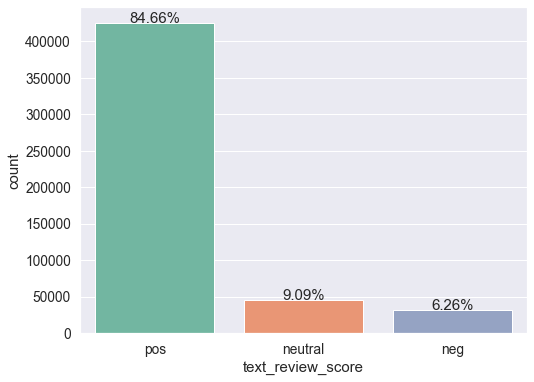

In [62]:
#visualize the distribution sentiment emotions
count_plot(df=unique_beer_data,feature='text_review_score',title='Percentage% of Emotions contains')

`After looking plot we can say that it contains highly positive review with 84% of positive text and neutral with 9.09% followed by negative review 6.26%`

In [63]:
#As we got the sentiment emotions of text review we will start analyse favourite beer style 
favourite_beer = unique_beer_data[['beer_style','text_review_score']]

In [64]:
favourite_beer

,beer_style,text_review_score
0,Hefeweizen,neutral
1,English Strong Ale,neutral
2,Foreign / Export Stout,neutral
3,German Pilsener,pos
4,American Double / Imperial IPA,pos
...,...,...
528792,German Pilsener,pos
528793,German Pilsener,pos
528794,German Pilsener,pos
528795,German Pilsener,pos


#### **Note**:- Here text_review_score column is same as a text review which converted to sentiment emotions such pos,neg and neutral

In [65]:
#filtering the only positive column as we want high positive reviews on beer style
fav_beer = favourite_beer[favourite_beer['text_review_score']=='pos']
fav_beer

,beer_style,text_review_score
3,German Pilsener,pos
4,American Double / Imperial IPA,pos
5,Herbed / Spiced Beer,pos
6,Herbed / Spiced Beer,pos
7,Herbed / Spiced Beer,pos
...,...,...
528791,German Pilsener,pos
528792,German Pilsener,pos
528793,German Pilsener,pos
528794,German Pilsener,pos


In [66]:
#Here we got the result with the most poisitve review 
fav_beer.groupby('beer_style')['text_review_score'].count().sort_values(ascending=False).head()

beer_style
American IPA                        35245
American Double / Imperial IPA      21987
American Double / Imperial Stout    20734
American Pale Ale (APA)             15390
Russian Imperial Stout              14872
Name: text_review_score, dtype: int64

`These are the favourites beer_style as per review text:`
* **American IPA**
* **American Double / Imperial IPA**
* **American Double / Imperial Stout**
* **American Pale Ale (APA)**
* **Russian Imperial Stout** 

### 6.How does written review compare to overall review score for the beer styles?

`Here we compare the overall review with text based review which is defined as text_review_score`

In [67]:
#remove duplicate value if exist
beer_compare = unique_beer_data.drop_duplicates(subset=['beer_style','review_overall','text_review_score'],keep='first')

In [68]:
#checking duplication
sum(beer_compare.duplicated(['beer_style','review_overall','text_review_score']))

0

`We can see that there are no duplication after removing duplicate from feature`

In [69]:
#As question defined we have to compare overall review with text based review as per beer style 
#so we only took selected features based on questions
beer_compare[['beer_style','review_overall','text_review_score']]

,beer_style,review_overall,text_review_score
0,Hefeweizen,1.5,neutral
1,English Strong Ale,3.0,neutral
2,Foreign / Export Stout,3.0,neutral
3,German Pilsener,3.0,pos
4,American Double / Imperial IPA,4.0,pos
...,...,...,...
507816,American Stout,5.0,neg
510003,Gose,1.0,neg
512809,Flanders Red Ale,1.5,neg
514313,Winter Warmer,5.0,neg


In [70]:
def plot_relative_distribution(df,feature,hue,title='',size=2):
    '''
    Parameters
    ----------
    df : DataFrame of dataset
    feature : feature of dataframe
    hue : lists of strings
    title : description of plot
    '''
    f,ax = plt.subplots(1,1,figsize=(11*size,6*size))
    total  = float(len(df))
    sns.countplot(x=feature,hue=hue,data=df,palette='Set2')
    plt.title(title)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
               height+3,
               '{:1.2f}%'.format(100*height/total),
               ha='center')

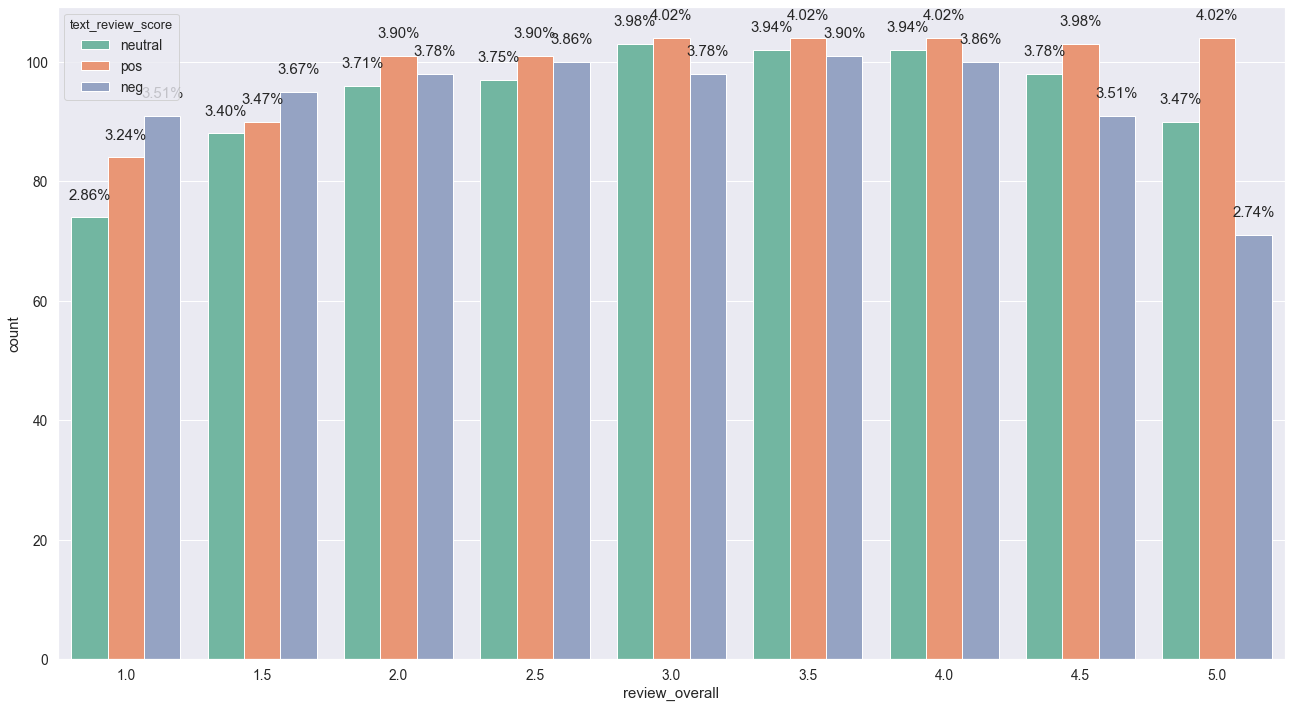

In [71]:
plot_relative_distribution(df=beer_compare,feature='review_overall',hue='text_review_score')

` As we can see overall review column mostly similar to text review column so positive review indicates high overall score where negative review showing low score and neutral show either positive or negative so here we can conclude both overall review and text based review are quiet similar reviews`